Original dataset size: (6650, 11)
Cleaned dataset size: (1608, 11)
Dataset size after numeric conversion: (1608, 9)

Full Correlation Matrix:
                          year  tourism_receipts  tourism_arrivals  \
year                  1.000000          0.067062          0.019284   
tourism_receipts      0.067062          1.000000          0.967132   
tourism_arrivals      0.019284          0.967132          1.000000   
tourism_exports       0.024189         -0.121742         -0.140281   
tourism_departures    0.006778          0.973169          0.983382   
tourism_expenditures -0.082718         -0.035622         -0.039541   
inflation            -0.106645         -0.073900         -0.075014   
unemployment         -0.096365         -0.020789          0.009336   
gdp                   0.033815          0.981360          0.945220   

                      tourism_exports  tourism_departures  \
year                         0.024189            0.006778   
tourism_receipts            -0.1217

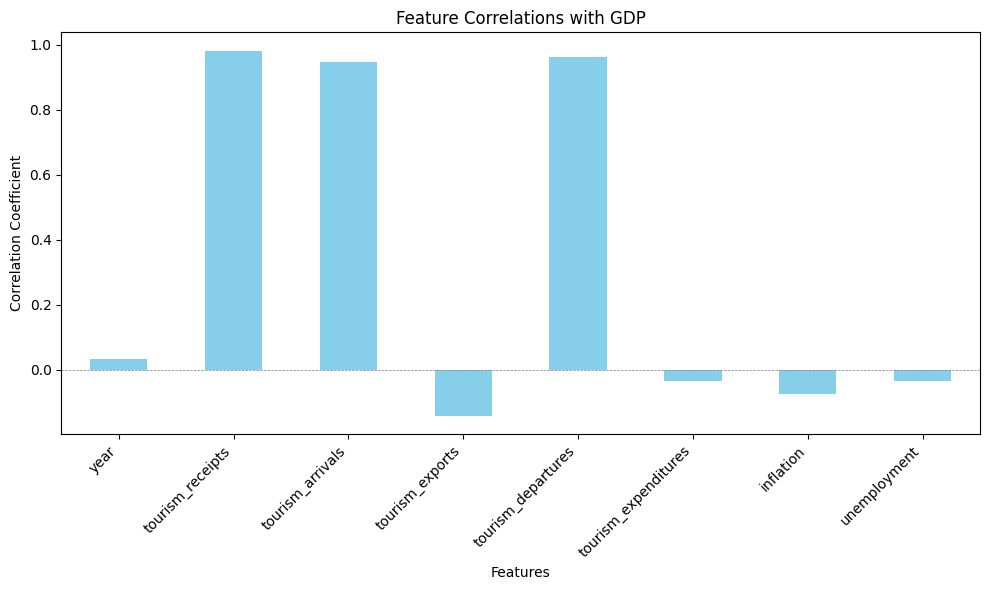

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Load the full dataset from CSV
df = pd.read_csv('tourism_and_economic_impact.csv')

# Remove rows with any empty cells (NaN values)
df_cleaned = df.dropna()
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")

# --- Prepare Data for Correlation Analysis ---
# Define all numeric features and target
features = ['year', 'tourism_receipts', 'tourism_arrivals', 'tourism_exports', 
            'tourism_departures', 'tourism_expenditures', 'inflation', 'unemployment']
target = 'gdp'
all_columns = features + [target]

# Ensure the cleaned dataset has the required columns
if not all(col in df_cleaned.columns for col in all_columns):
    missing = [col for col in all_columns if col not in df_cleaned.columns]
    raise ValueError(f"Missing required columns: {missing}")

# Extract relevant columns
data_for_corr = df_cleaned[all_columns]

# Ensure numeric data
for col in all_columns:
    if not pd.api.types.is_numeric_dtype(data_for_corr[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        data_for_corr[col] = pd.to_numeric(data_for_corr[col], errors='coerce')

# Drop any rows with NaN values introduced by coercion
data_for_corr = data_for_corr.dropna()
print(f"Dataset size after numeric conversion: {data_for_corr.shape}")

# Compute the correlation matrix
corr_matrix = data_for_corr.corr()
print("\nFull Correlation Matrix:")
print(corr_matrix)

# Extract correlations with GDP
gdp_correlations = corr_matrix[target].drop(target)
print("\nCorrelations with GDP:")
print(gdp_correlations)

# Visualize the correlations as a bar chart
plt.figure(figsize=(10, 6))
gdp_correlations.plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with GDP')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Original dataset size: (6650, 11)
Dataset size after keeping rows with non-NaN in key columns (including GDP): (1993, 11)
Dataset size after numeric conversion: (1993, 9)

Full Correlation Matrix:
                          year  tourism_receipts  tourism_arrivals  \
year                  1.000000          0.063883          0.019885   
tourism_receipts      0.063883          1.000000          0.969854   
tourism_arrivals      0.019885          0.969854          1.000000   
tourism_exports       0.008447         -0.127033         -0.143907   
tourism_departures    0.008703          0.972805          0.983969   
tourism_expenditures -0.088797         -0.040911         -0.044241   
inflation            -0.097202         -0.071271         -0.071962   
unemployment         -0.083664         -0.016380          0.013463   
gdp                   0.036154          0.983256          0.950855   

                      tourism_exports  tourism_departures  \
year                         0.008447    

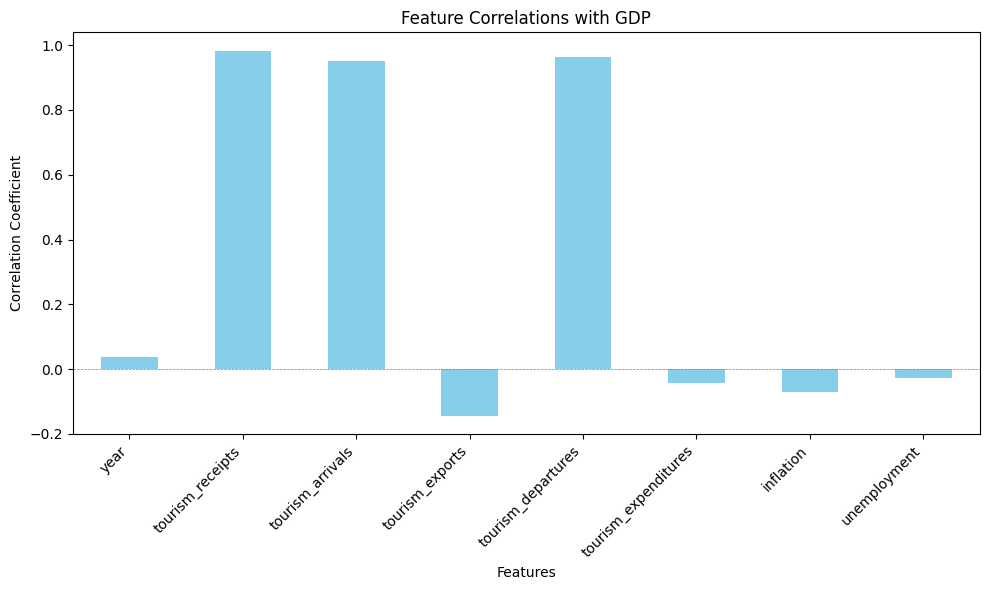

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Load the full dataset from CSV
df = pd.read_csv('tourism_and_economic_impact.csv')
print(f"Original dataset size: {df.shape}")

# Define the 3 most correlated columns with GDP plus the target
key_columns = ['tourism_receipts', 'tourism_arrivals', 'tourism_departures', 'gdp']

# Keep only rows where all 4 key columns are not NaN
df_cleaned = df.dropna(subset=key_columns)
print(f"Dataset size after keeping rows with non-NaN in key columns (including GDP): {df_cleaned.shape}")

# --- Prepare Data for Correlation Analysis ---
# Define all numeric features and target
features = ['year', 'tourism_receipts', 'tourism_arrivals', 'tourism_exports', 
            'tourism_departures', 'tourism_expenditures', 'inflation', 'unemployment']
target = 'gdp'
all_columns = features + [target]

# Ensure the cleaned dataset has the required columns
if not all(col in df_cleaned.columns for col in all_columns):
    missing = [col for col in all_columns if col not in df_cleaned.columns]
    raise ValueError(f"Missing required columns: {missing}")

# Extract relevant columns
data_for_corr = df_cleaned[all_columns]

# Ensure numeric data
for col in all_columns:
    if not pd.api.types.is_numeric_dtype(data_for_corr[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        data_for_corr[col] = pd.to_numeric(data_for_corr[col], errors='coerce')

# No further dropna() here; keep rows with NaNs in non-key columns
print(f"Dataset size after numeric conversion: {data_for_corr.shape}")

# Compute the correlation matrix
corr_matrix = data_for_corr.corr()
print("\nFull Correlation Matrix:")
print(corr_matrix)

# Extract correlations with GDP
gdp_correlations = corr_matrix[target].drop(target)
print("\nCorrelations with GDP:")
print(gdp_correlations)

# Visualize the correlations as a bar chart
plt.figure(figsize=(10, 6))
gdp_correlations.plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with GDP')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Feature Selection ---
# Define the three key features (raw values)
features = ['tourism_receipts', 'tourism_arrivals', 'tourism_departures']
target = 'gdp'

# Ensure numeric data
for col in features + [target]:
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Prepare X and y (no NaNs possible in these columns due to earlier dropna)
X = df_cleaned[features]
y = df_cleaned[target]
print(f"Dataset size after feature selection: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize for FNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Models ---
# 1. LightGBM
lgb_model = lgb.LGBMRegressor(
    num_leaves=31, learning_rate=0.05, n_estimators=100, 
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)

# 2. CatBoost
cat_model = CatBoostRegressor(
    iterations=100, learning_rate=0.05, depth=6, 
    random_seed=42, verbose=0, thread_count=4
)
cat_model.fit(X_train, y_train)

# 3. FNN
fnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Now 3 features
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(
    X_train_scaled, y_train, 
    epochs=100, batch_size=32, 
    validation_split=0.2, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# --- Evaluate Models ---
models = {'LightGBM': lgb_model, 'CatBoost': cat_model, 'FNN': fnn_model}
for name, model in models.items():
    if name == 'FNN':
        y_pred = model.predict(X_test_scaled, verbose=0).flatten()
    else:
        y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"{name} Results:")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.4f}")
    print(f"  MAPE: {mape:.4f}\n")


Dataset size after feature selection: (1608, 3)
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1286, number of used features: 3
[LightGBM] [Info] Start training from score 3705256884105.903809


TBB Warning: The number of workers is currently limited to 1. The request for 63 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

2025-05-02 20:49:45.310866: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


LightGBM Results:
  MAE : 646979621368.71
  RMSE: 2442295559179.89
  R²  : 0.9502
  MAPE: 1.8804

CatBoost Results:
  MAE : 651039296258.07
  RMSE: 1497049829929.58
  R²  : 0.9813
  MAPE: 2.3902

FNN Results:
  MAE : 3386875557899.14
  RMSE: 11455562896068.41
  R²  : -0.0958
  MAPE: 1.0000



/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Feature Selection ---
features = ['tourism_receipts', 'tourism_arrivals', 'tourism_departures']
target = 'gdp'

# Ensure numeric data
for col in features + [target]:
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# --- Scale by millions (drop six zeros) ---
scale_cols = features + [target]
df_cleaned[scale_cols] = df_cleaned[scale_cols] / 1e6

# Prepare X and y (no NaNs possible in these columns due to earlier dropna)
X = df_cleaned[features]
y = df_cleaned[target]
print(f"Dataset size after feature selection: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize for FNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Models ---
# 1. LightGBM
lgb_model = lgb.LGBMRegressor(
    num_leaves=31, learning_rate=0.05, n_estimators=100,
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)

# 2. CatBoost
cat_model = CatBoostRegressor(
    iterations=100, learning_rate=0.05, depth=6,
    random_seed=42, verbose=0, thread_count=4
)
cat_model.fit(X_train, y_train)

# 3. FNN
fnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(
    X_train_scaled, y_train,
    epochs=100, batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# --- Evaluate Models ---
models = {'LightGBM': lgb_model, 'CatBoost': cat_model, 'FNN': fnn_model}
for name, model in models.items():
    if name == 'FNN':
        y_pred = model.predict(X_test_scaled, verbose=0).flatten()
    else:
        y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAPE: {mape:.4f}")


/tmp/ipykernel_158485/493749945.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[scale_cols] = df_cleaned[scale_cols] / 1e6


Dataset size after feature selection: (1608, 3)
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1286, number of used features: 3
[LightGBM] [Info] Start training from score 3705256.876723
LightGBM - RMSE: 2442295.60, MAPE: 1.8804
CatBoost - RMSE: 1497049.84, MAPE: 2.3902
FNN - RMSE: 2369030.53, MAPE: 15.8668


/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Feature Selection ---
# Define the three key features (raw values)
features = ['tourism_receipts', 'tourism_arrivals']
target = 'gdp'

# Ensure numeric data
for col in features + [target]:
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Prepare X and y (no NaNs possible in these columns due to earlier dropna)
X = df_cleaned[features]
y = df_cleaned[target]
print(f"Dataset size after feature selection: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize for FNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Models ---
# 1. LightGBM
lgb_model = lgb.LGBMRegressor(
    num_leaves=31, learning_rate=0.05, n_estimators=100, 
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)

# 2. CatBoost
cat_model = CatBoostRegressor(
    iterations=100, learning_rate=0.05, depth=6, 
    random_seed=42, verbose=0, thread_count=4
)
cat_model.fit(X_train, y_train)

# 3. FNN
fnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Now 3 features
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(
    X_train_scaled, y_train, 
    epochs=100, batch_size=32, 
    validation_split=0.2, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# --- Evaluate Models ---
models = {'LightGBM': lgb_model, 'CatBoost': cat_model, 'FNN': fnn_model}
for name, model in models.items():
    if name == 'FNN':
        y_pred = model.predict(X_test_scaled, verbose=0).flatten()
    else:
        y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"{name} Results:")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.4f}")
    print(f"  MAPE: {mape:.4f}\n")

Dataset size after feature selection: (1608, 2)
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1286, number of used features: 2
[LightGBM] [Info] Start training from score 3705256884105.903809
LightGBM Results:
  MAE : 741625203448.88
  RMSE: 2512926186320.98
  R²  : 0.9473
  MAPE: 2.4196

CatBoost Results:
  MAE : 701491495388.31
  RMSE: 1648621820163.64
  R²  : 0.9773
  MAPE: 3.0911

FNN Results:
  MAE : 3386875557898.60
  RMSE: 11455562896068.13
  R²  : -0.0958
  MAPE: 1.0000



/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
# --- Analyze column magnitudes before scaling ---
print("Column Value Statistics:\n")

for col in ['tourism_receipts', 'tourism_arrivals']:
    col_values = df_cleaned[col].dropna()
    print(f"{col}:")
    print(f"  Min     : {col_values.min():.2e}")
    print(f"  Max     : {col_values.max():.2e}")
    print(f"  Mean    : {col_values.mean():.2e}")
    print(f"  Std Dev : {col_values.std():.2e}")
    print(f"  Median  : {col_values.median():.2e}")
    print(f"  Range   : {(col_values.max() - col_values.min()):.2e}")
    print()


Column Value Statistics:

tourism_receipts:
  Min     : 1.32e+07
  Max     : 1.86e+12
  Mean    : 6.39e+10
  Std Dev : 1.89e+11
  Median  : 5.75e+09
  Range   : 1.86e+12

tourism_arrivals:
  Min     : 2.90e+04
  Max     : 2.40e+09
  Mean    : 1.08e+08
  Std Dev : 2.90e+08
  Median  : 6.72e+06
  Range   : 2.40e+09



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Feature Selection ---
features = ['tourism_receipts', 'tourism_arrivals']
target   = 'gdp'

# Ensure numeric
for col in features + [target]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# --- Apply Feature Scaling ---
X = pd.DataFrame({
    'tourism_receipts': df_cleaned['tourism_receipts'] / 1e10,
    'tourism_arrivals': df_cleaned['tourism_arrivals'] / 1e7,
})
y = df_cleaned[target]  # GDP remains in original scale

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y_train = y_train.values.ravel()
y_test  = y_test.values.ravel()

# --- Train Models ---
# 1. LightGBM
lgb_model = lgb.LGBMRegressor(
    num_leaves=31, learning_rate=0.05, n_estimators=100,
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)

# 2. CatBoost
cat_model = CatBoostRegressor(
    iterations=100, learning_rate=0.05, depth=6,
    random_seed=42, verbose=0, thread_count=4
)
cat_model.fit(X_train, y_train)

# 3. FNN
fnn_model = Sequential([
    Input(shape=(len(features),)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# --- Evaluate Models ---
models = {'LightGBM': lgb_model, 'CatBoost': cat_model, 'FNN': fnn_model}
for name, model in models.items():
    if name == 'FNN':
        y_pred = model.predict(X_test, verbose=0).flatten()
    else:
        y_pred = model.predict(X_test)
    
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2   = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"{name} Results:")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.4f}")
    print(f"  MAPE: {mape:.4f}\n")


/tmp/ipykernel_482044/896063354.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1286, number of used features: 2
[LightGBM] [Info] Start training from score 3705256884105.903809
LightGBM Results:
  MAE : 741625203448.88
  RMSE: 2512926186320.98
  R²  : 0.9473
  MAPE: 2.4196

CatBoost Results:
  MAE : 701491495388.31
  RMSE: 1648621820163.64
  R²  : 0.9773
  MAPE: 3.0911

FNN Results:
  MAE : 3386875557896.01
  RMSE: 11455562896058.78
  R²  : -0.0958
  MAPE: 1.0000



/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
df_cleaned.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
13,Australia,AUS,1999,1.140800e+10,4459000.0,15.247228,3210000.0,10.362464,3.896522e+11,1.483129,6.876
15,Azerbaijan,AZE,1999,9.300000e+07,602000.0,7.254171,1204000.0,7.766452,4.581249e+09,-8.525170,16.250
16,Burundi,BDI,1999,1.200000e+06,26000.0,2.019364,27000.0,NaN,8.080772e+08,3.385424,14.000
21,Bulgaria,BGR,1999,1.184000e+09,5056000.0,20.432201,2376000.0,11.384618,1.362733e+10,2.573043,14.100
28,Bolivia,BOL,1999,1.240000e+08,342000.0,9.461315,253000.0,5.883240,8.285064e+09,2.159516,3.930


In [11]:
X.head()

,tourism_receipts,tourism_arrivals,tourism_departures
13,1.140800e+10,4459000.0,3210000.0
15,9.300000e+07,602000.0,1204000.0
16,1.200000e+06,26000.0,27000.0
21,1.184000e+09,5056000.0,2376000.0
28,1.240000e+08,342000.0,253000.0


In [12]:
y.head()

13    3.896522e+11
15    4.581249e+09
16    8.080772e+08
21    1.362733e+10
28    8.285064e+09
Name: gdp, dtype: float64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Feature Selection ---
# Define the three key features (raw values)
features = ['tourism_receipts', 'tourism_arrivals', 'inflation', 'tourism_expenditures']
target = 'gdp'

# Ensure numeric data
for col in features + [target]:
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Prepare X and y (no NaNs possible in these columns due to earlier dropna)
X = df_cleaned[features]
y = df_cleaned[target]
print(f"Dataset size after feature selection: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize for FNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Models ---
# 1. LightGBM
lgb_model = lgb.LGBMRegressor(
    num_leaves=31, learning_rate=0.05, n_estimators=100, 
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)

# 2. CatBoost
cat_model = CatBoostRegressor(
    iterations=100, learning_rate=0.05, depth=6, 
    random_seed=42, verbose=0, thread_count=4
)
cat_model.fit(X_train, y_train)

# 3. FNN
fnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Now 4 features
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(
    X_train_scaled, y_train, 
    epochs=100, batch_size=32, 
    validation_split=0.2, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# --- Evaluate Models ---
models = {'LightGBM': lgb_model, 'CatBoost': cat_model, 'FNN': fnn_model}
for name, model in models.items():
    if name == 'FNN':
        y_pred = model.predict(X_test_scaled, verbose=0).flatten()
    else:
        y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAPE: {mape:.4f}")

Dataset size after feature selection: (1608, 4)
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1286, number of used features: 4
[LightGBM] [Info] Start training from score 3705256884105.903809


TBB Warning: The number of workers is currently limited to 1. The request for 63 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

2025-04-24 21:23:46.346282: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


LightGBM - RMSE: 2195131772759.48, MAPE: 3.8997
CatBoost - RMSE: 1541043681308.62, MAPE: 4.2720
FNN - RMSE: 11455562896067.96, MAPE: 1.0000


/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the raw dataset
# Note: Assuming df_cleaned is already defined; replace with your loading logic if needed
# df = pd.read_csv('data.csv')
# df_cleaned = df.dropna(subset=['tourism_receipts', 'tourism_arrivals', 'gdp'])

# --- Feature Selection ---
features = ['tourism_receipts', 'tourism_arrivals']
target = 'gdp'

# Ensure numeric data and apply log-transformation
for col in features + [target]:
    if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
        print(f"Error: '{col}' contains non-numeric values. Converting to numeric.")
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    df_cleaned[f'{col}_log'] = np.log1p(df_cleaned[col])  # log1p handles zeros

# Use log-transformed features
log_features = [f'{feat}_log' for feat in features]
X = df_cleaned[log_features]
y = df_cleaned[f'{target}_log']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize for FNN (replacing your manual scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Models ---
# 1. LightGBM
lgb_model = lgb.LGBMRegressor(
    num_leaves=31, learning_rate=0.05, n_estimators=100,
    random_state=42, force_col_wise=True
)
lgb_model.fit(X_train, y_train)

# 2. CatBoost
cat_model = CatBoostRegressor(
    iterations=100, learning_rate=0.05, depth=6,
    random_seed=42, verbose=0, thread_count=4
)
cat_model.fit(X_train, y_train)

# 3. FNN
fnn_model = Sequential([
    Input(shape=(len(log_features),)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(
    X_train_scaled, y_train,
    epochs=100, batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=0
)

# --- Evaluate Models ---
models = {'LightGBM': lgb_model, 'CatBoost': cat_model, 'FNN': fnn_model}
for name, model in models.items():
    if name == 'FNN':
        y_pred_log = model.predict(X_test_scaled, verbose=0).flatten()
    else:
        y_pred_log = model.predict(X_test)

    # Log Scale Evaluation
    mae_log = mean_absolute_error(y_test, y_pred_log)
    rmse_log = mean_squared_error(y_test, y_pred_log, squared=False)
    r2_log = r2_score(y_test, y_pred_log)
    mape_log = mean_absolute_percentage_error(y_test, y_pred_log)
    print(f"{name} (Log Scale):")
    print(f"  MAE : {mae_log:.4f} log units")
    print(f"  RMSE: {rmse_log:.4f} log units")
    print(f"  R²  : {r2_log:.4f}")
    print(f"  MAPE: {mape_log:.4f}")

/tmp/ipykernel_482044/626052778.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{col}_log'] = np.log1p(df_cleaned[col])  # log1p handles zeros


[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1286, number of used features: 2
[LightGBM] [Info] Start training from score 26.169696
LightGBM (Log Scale):
  MAE : 0.7133 log units
  RMSE: 0.9356 log units
  R²  : 0.8447
  MAPE: 0.0280
CatBoost (Log Scale):
  MAE : 0.7411 log units
  RMSE: 0.9549 log units
  R²  : 0.8382
  MAPE: 0.0289
FNN (Log Scale):
  MAE : 0.8147 log units
  RMSE: 1.0627 log units
  R²  : 0.7996
  MAPE: 0.0316


/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/yyu11/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
